In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
plt.rc('font', size=16)          # controls default text sizes
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=16) 
plt.rc('figure', titlesize=24)
from IPython.display import display
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Do Pacer Trendpilot Exchange Traded Funds Beat the Market?
## Background
### S&P 500
The S&P 500 is a United States stock market index that tracks the performance of the top 500 largest United States based companies.  It is the most oftenly used benchmark to measure portfolio performance against as it includes only large, well developed, companies and is a good representation of a well diversified stock portfolio. For most individuals, picking individual stock will not yield better returns than the S&P 500. For this reason, many investors are content with investing in exchange traded funds (ETFs) that track the S&P 500. ETFs are funds that hold many investments, however can be bought and sold like an individual stock. This allows individuals to get instant diversification with the purchase of one ETF. Many ETFs hold the same 500 stocks used in S&P 500 index with the goal of identically tracking the returns of the S&P 500. However, some ETFs might track other indices, some may pick their own investments, and some may choose when to move in and out of the market. Pacer Trendpilot ETFs are an example of an ETF which moved in and out of the market based on certain indicators.

### Pacer Trendpilot ETFs

[Pacer Trendpilot](https://www.paceretfs.com/) is a company which offers many ETFs. One of these ETFs is their United States large company ETF (PTLC) which uses the S&P 500 as its benchmark.  However, this ETF is not fully invested in the S&P 500 at all time and use rules to determine when to invest or pull their money out of the market. To learn more about the rules of this ETF, click [here](https://www.paceretfs.com/products/ptlc). In short, during a bull (uptreading) market, the fund is fully invested in stocks to track the S&P 500.  During a stagnant market, the fund invest only half of its money in the market. Finally, during an extended bear (downtrending) market, the fund pulls all of its money out of the market and buys 3-month treasury bills (similar to cash). Pacer Trendpilot claims that by following these rules, they can potentially yield the benefits of tracking the S&P 500 while minimizing risk.

## Goal
Since PTLC was developed in 2015 (and only started tracking the S&P 500 since 11/1/2017), we less than 5 years of data on the performance of this fund.  However, since the strategy used in this fund is outlined on their website, the performance of the fund can be modeled in years prior to its development.  The goals of this project are listed below.

1. Model the performance of PTLC in years prior to its developement 
2. Plot the true performance of PTLC against the model of PTLC to show that the model accurately represents the performance of the fund
3. Compare how PTLC would have performed in the past during numerous market conditions

## Analysis

In [3]:
## To Download these .csv files, see README ##

#Loading in and organizing data
sp500=pd.read_csv('SP500.csv') #S&P 500 Data
PTLC=pd.read_csv('PTLC.csv') #PTLC Data

#Convert data to pandas datetime variable and setting date as the index
sp500.Date=pd.to_datetime(sp500['Date']) 
sp500=sp500.set_index('Date')
PTLC.Date=pd.to_datetime(PTLC['Date'])
PTLC=PTLC.set_index('Date')

#Checking to see that data is organized properly
display('S&P 500 data',sp500.head(),'PTLC data',PTLC.head())

'S&P 500 data'

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0


'PTLC data'

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-06-12,24.930000,24.930000,24.830000,24.879999,24.078876,398500
2015-06-15,24.780001,24.780001,24.650000,24.760000,23.962742,214000
2015-06-16,24.809999,24.910000,24.740000,24.889999,24.088556,75400
2015-06-17,25.010000,25.020000,24.820000,24.950001,24.146626,151300
2015-06-18,25.080000,25.254999,25.049999,25.170000,24.359541,338000


Below we can see a plot of the price of the S&P 500 starting from 1927 which is the earliest data available. 

Text(0.5, 1.0, 'S&P 500 (1927-2019)')

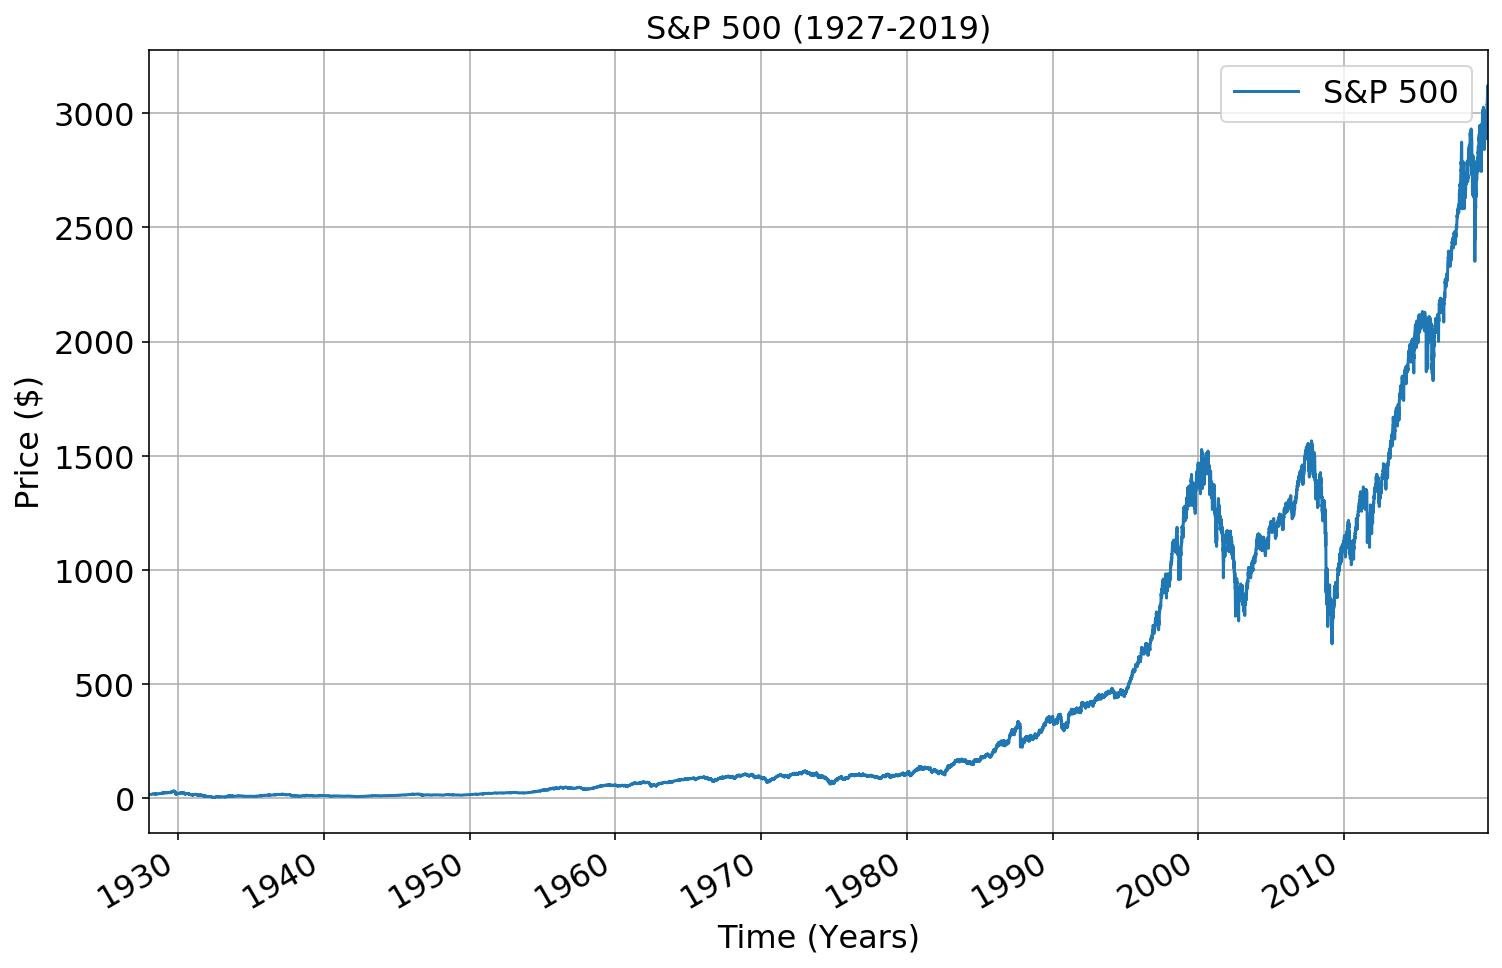

In [3]:
ax=sp500.Close.plot(figsize=(12,8),label='S&P 500')
ax.set_xlabel('Time (Years)')
ax.set_ylabel('Price ($)')
ax.grid('--')
ax.legend()
ax.set_title('S&P 500 (1927-2019)')

We can also look at the performance of PTLC from the time of its inception.

Text(0.5, 1.0, 'PTLC (2015-2019)')

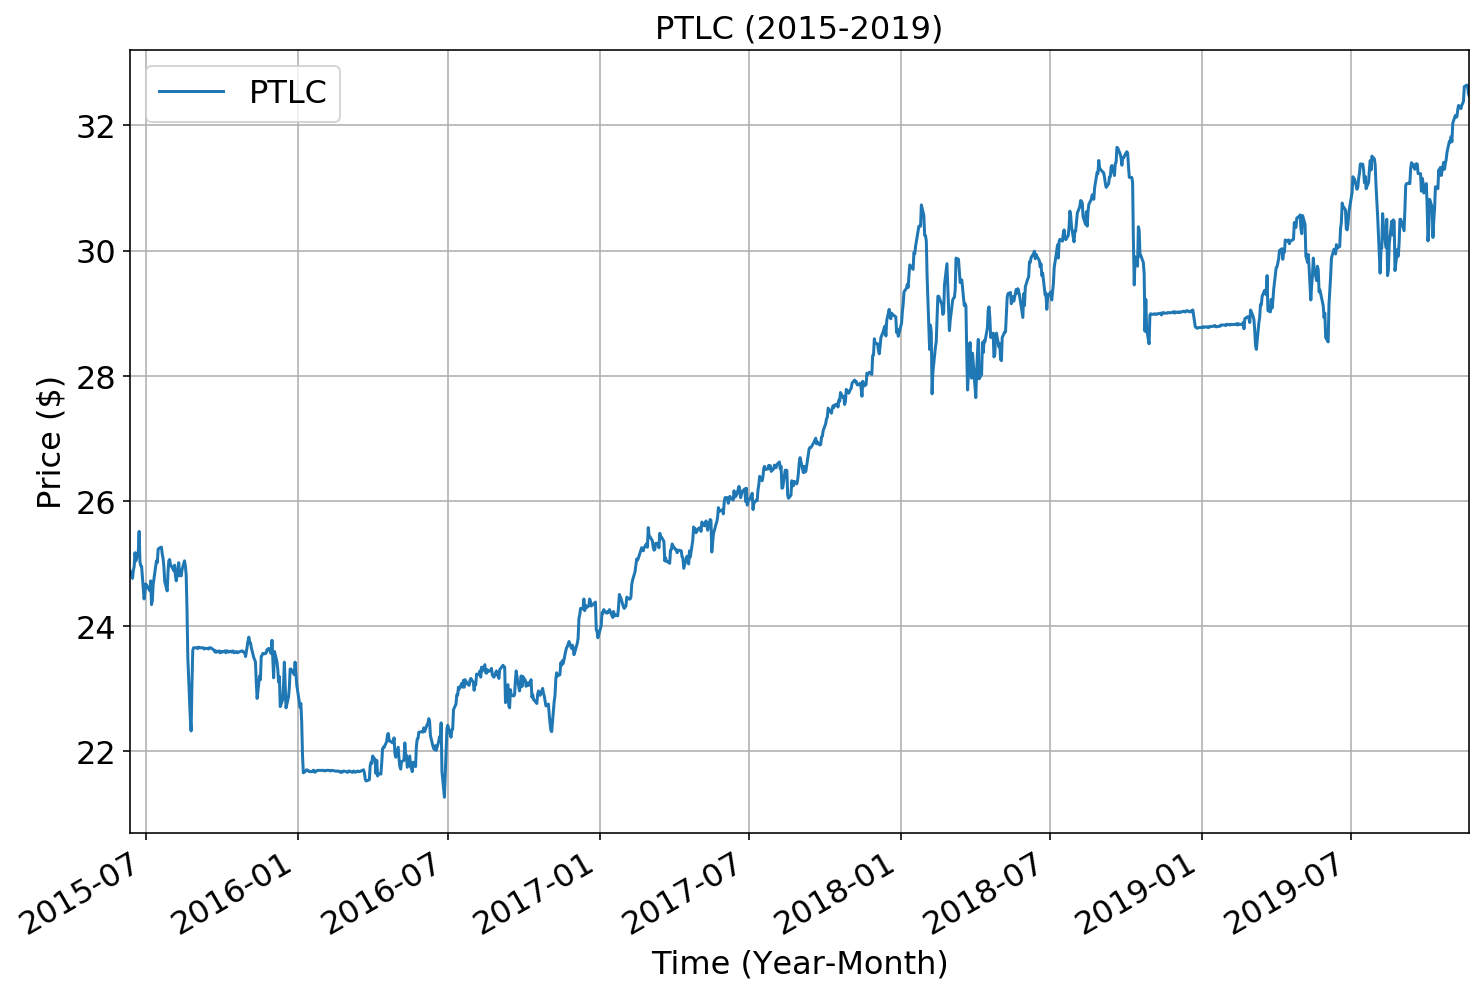

In [4]:
ax=PTLC.Close.plot(figsize=(12,8),label='PTLC')
ax.set_xlabel('Time (Year-Month)')
ax.set_ylabel('Price ($)')
ax.grid('--')
ax.legend()
ax.set_title('PTLC (2015-2019)')

If you note the units on the y-axis, it is clear that we cannot compare the data as is. The price of PTLC and the S&P 500 are quite different.  What we are really interested in is the percentage change in price over a given time period.  We therefore need to define a function that converts the units into percent return rather than absolute price. This is shown below.

In [5]:
def returns(ds,start_year,end_year,name):
    x=ds[start_year:end_year]
    x=(x-x[0])/x[0]
    ax=(x*100).plot(figsize=(12,8),label=name)
    ax.set_xlabel('Date')
    ax.set_ylabel('Total Return (%)')
    ax.grid('--')
    ax.legend()
    ax.set_title(start_year+'-'+end_year)
    return 

We can now use the returns function to compare how the S&P 500 and PTLC performed from 2016-2019

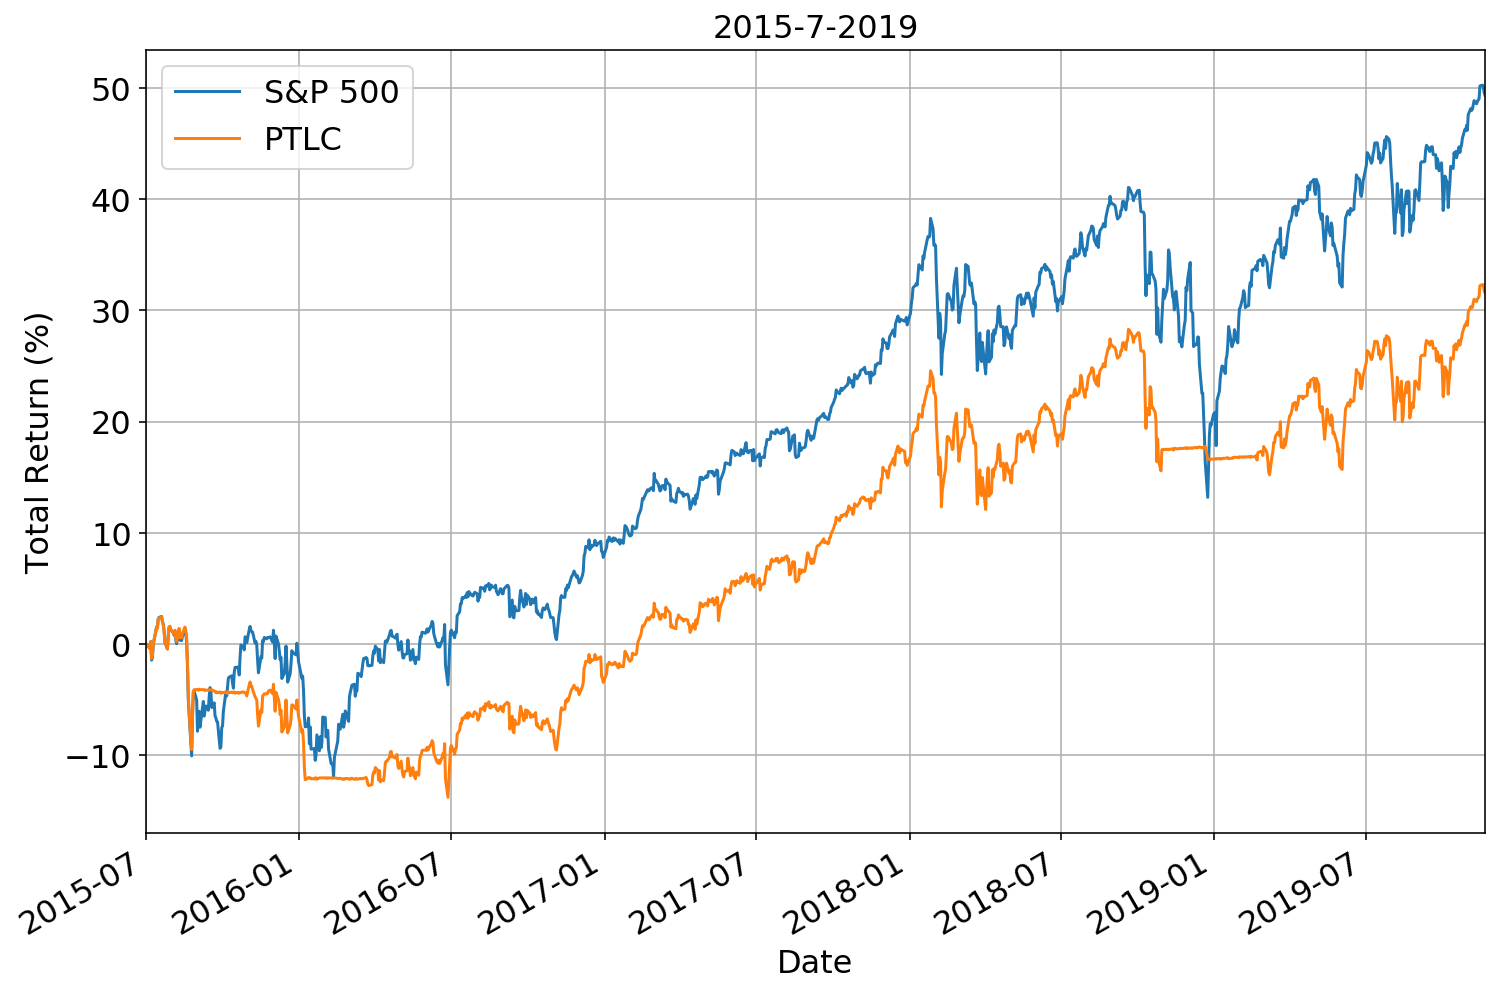

In [6]:
returns(sp500.Close,'2015-7','2019','S&P 500')
returns(PTLC.Close,'2015-7','2019', 'PTLC')

In [7]:
sp500_p=sp500.Close
x='R'
c=0
PTLC_model=pd.Series(np.ones_like(sp500_p.values), sp500.index)
for i in range(210,len(sp500_p)):
    if all(sp500_p.rolling(200).mean()[i-j]<sp500_p[i-j] for j in range(1,6)) or x=='G':
        PTLC_model[i]=PTLC_model[i-1]*(sp500_p[i]/sp500_p[i-1])
        x='G'
        
    if all(sp500_p.rolling(200).mean()[i-j]>sp500_p[i-j] for j in range(1,6)) and x!='R' or x=='Y':
        PTLC_model[i]=PTLC_model[i-1]*((sp500_p[i]/sp500_p[i-1]-1)/2+1)
        x='Y'
    if sp500_p[i-1]<sp500_p[i-6] and x=='Y' or x=='R':
        PTLC_model[i]=PTLC_model[i-1]
        x='R' 

## PTLC vs Model

Using the model defined above, we can compare from 11/1/2017 (when PTLC started tracking the S&P 500) to today to determine if the model accurately tracks the returns of PTLC.

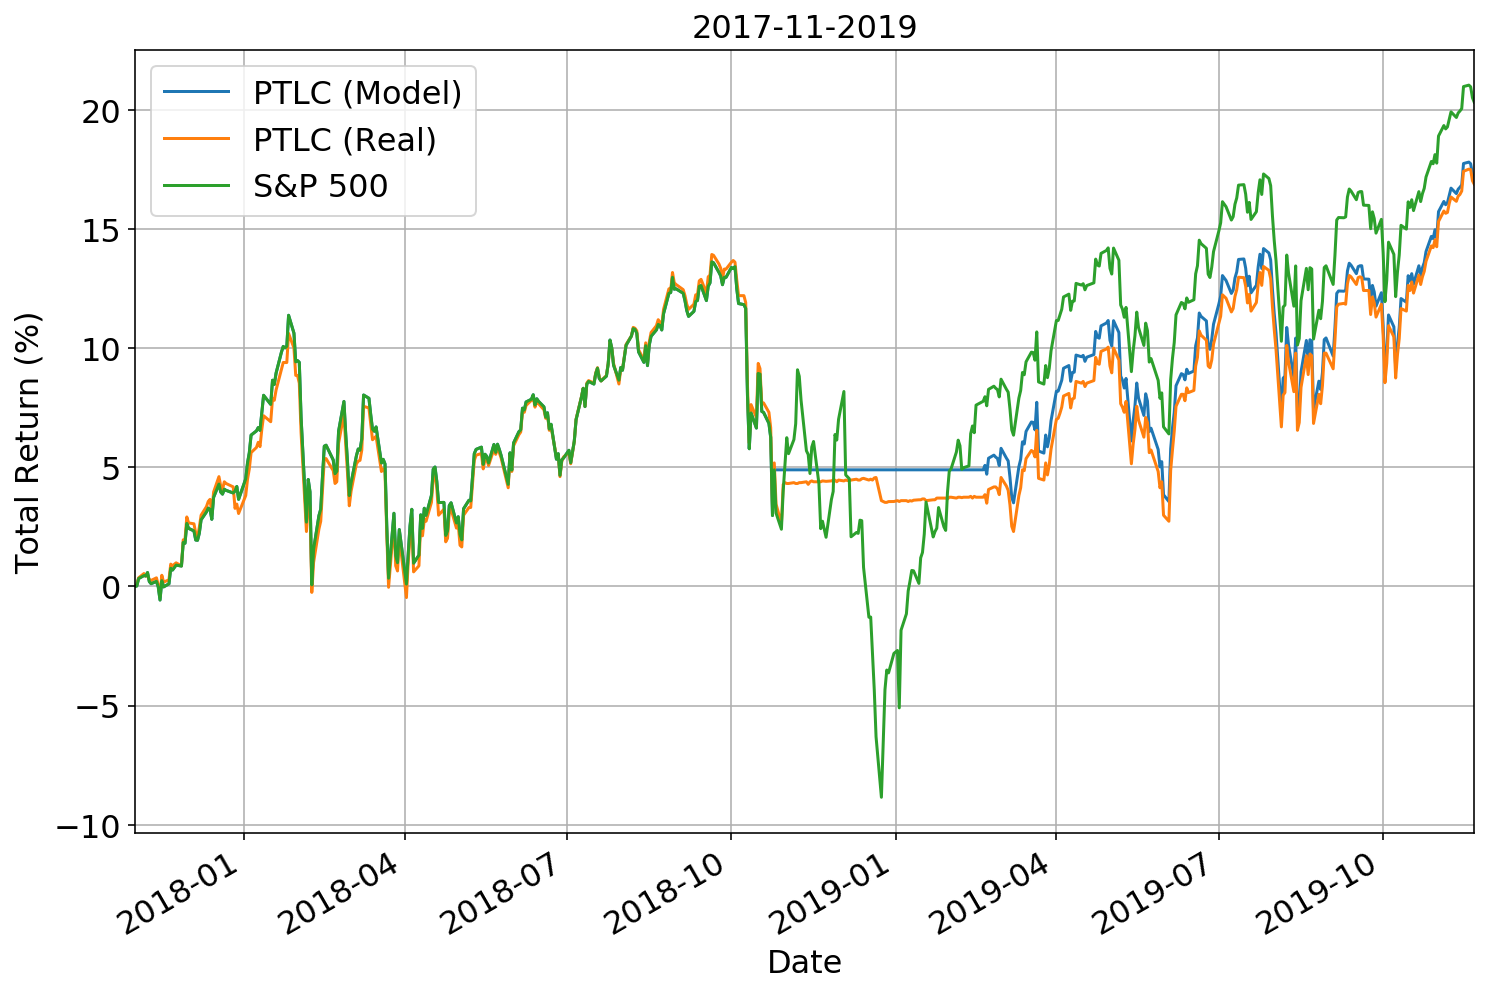

In [8]:
returns(PTLC_model,'2017-11','2019','PTLC (Model)')
returns(PTLC.Close,'2017-11','2019', 'PTLC (Real)')
returns(sp500.Close,'2017-11','2019','S&P 500')

Although there are slight differences between the true and modeled PTLC, the model seems to do a decent job at predicting the returns of PTLC. Specifically, it seems to be able to predict when PTLC will move out of the market (notice late 2018). We do see that the model seems to overpredict the returns of PTLC. This is most likely due to expense ratio of 0.6% that PTLC charges. Although this could be included in the model, it is purposely not included it in the model to provide a one to one comparison between the S&P500 and PTLC's strategy in general. It is also worth noting that when PTLC pulls money out of the market they are buying T-bills instead of holding cash.  This was also not taken into consideration in the model.

# Total Returns
We can look at the performance of PTLC versus the S&P 500 for the nearly 100 years worth of data.

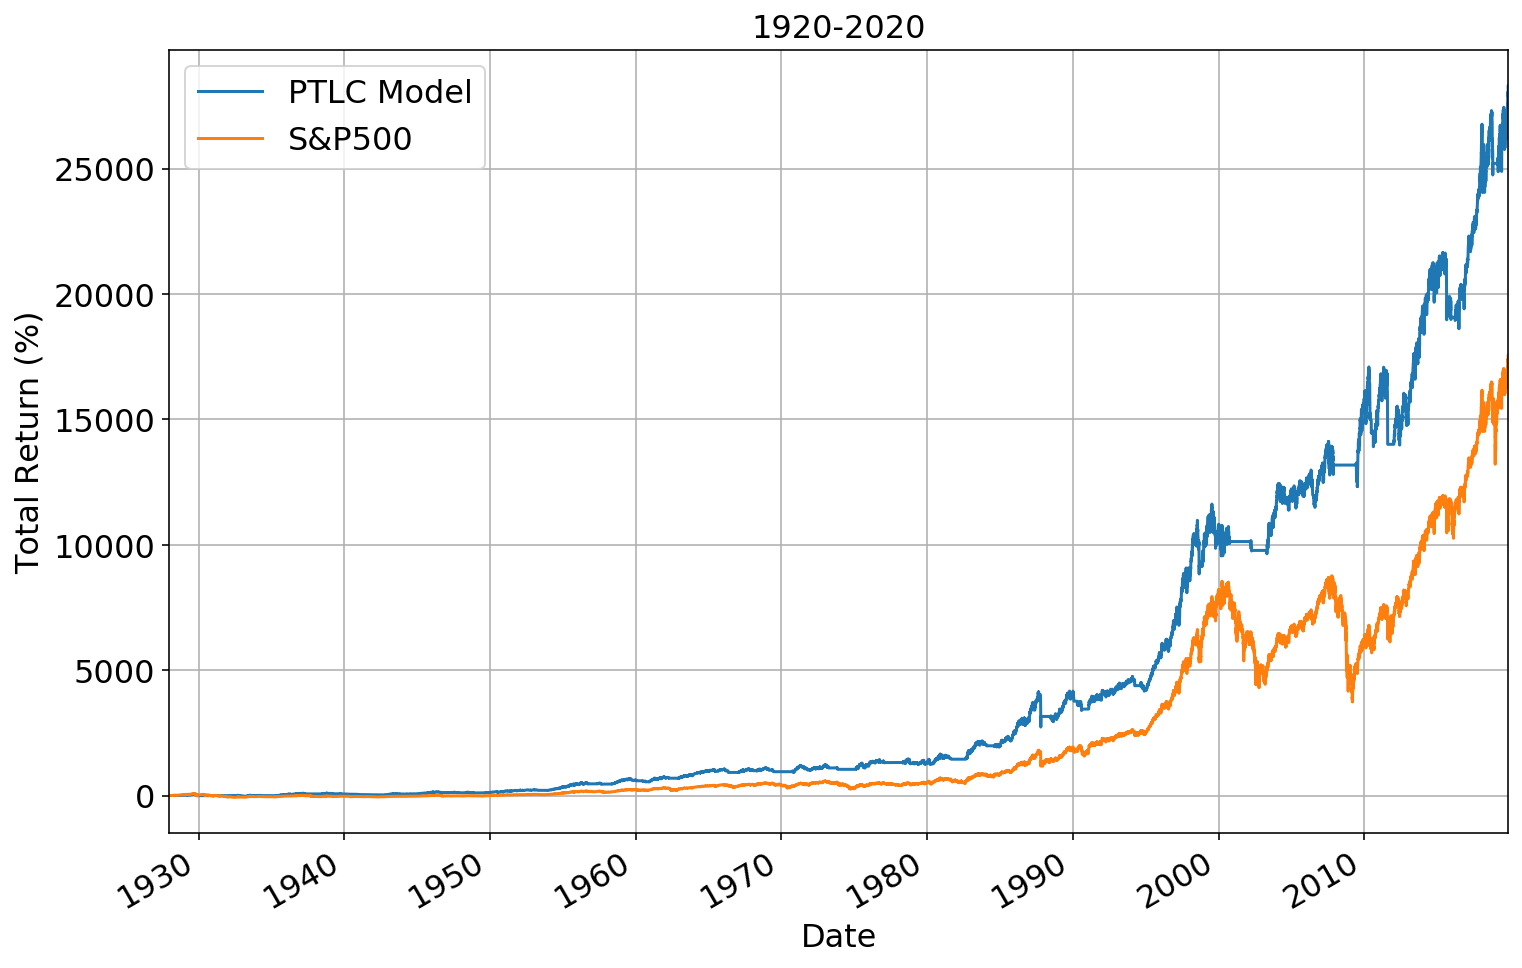

In [9]:
returns(PTLC_model,'1920','2020','PTLC Model')
returns(sp500.Close,'1920','2020', 'S&P500')

Although it is clear that PTLC would have outperformed the S&P 500 had one lump some of money been invested in 1927, it does not mean that it would have performed this well had money been put in at a different time period compared to the S&P 500.  This is because if PTLC outperformes the S&P 500 during the first few years after an investment, it may be difficult for the S&P 500 to catch up to its returns. For practical purposes it is worth investigating how PTLC would have performed against the S&P 500 over a 40 year period starting at different points in time.

## 40 Year Returns

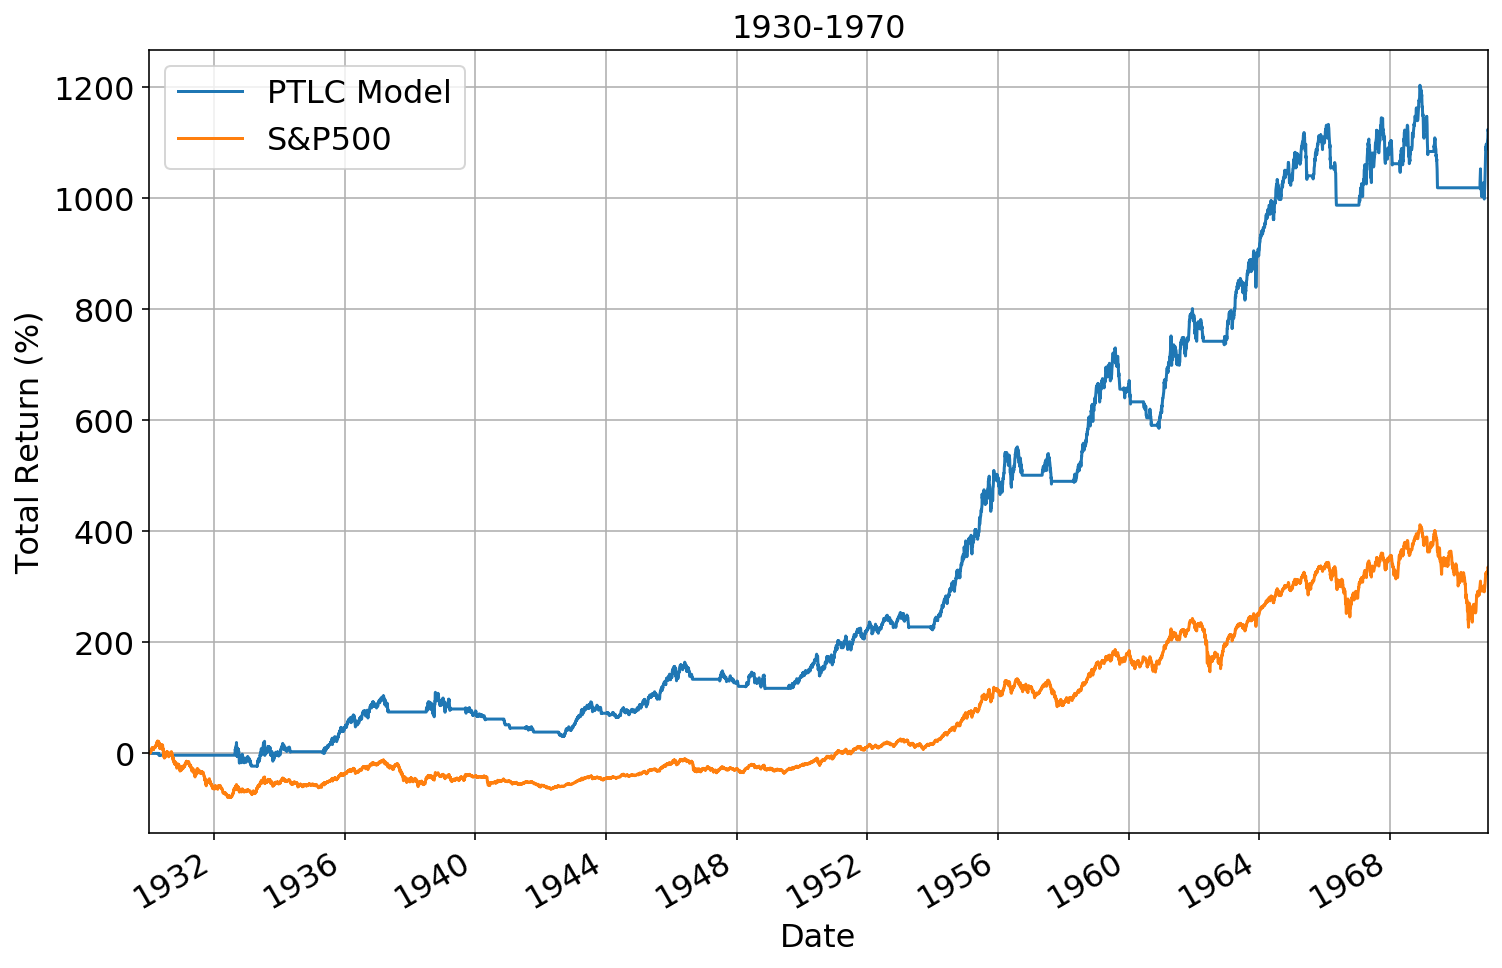

In [39]:
returns(PTLC_model,'1930','1970','PTLC Model')
returns(sp500.Close,'1930','1970', 'S&P500')

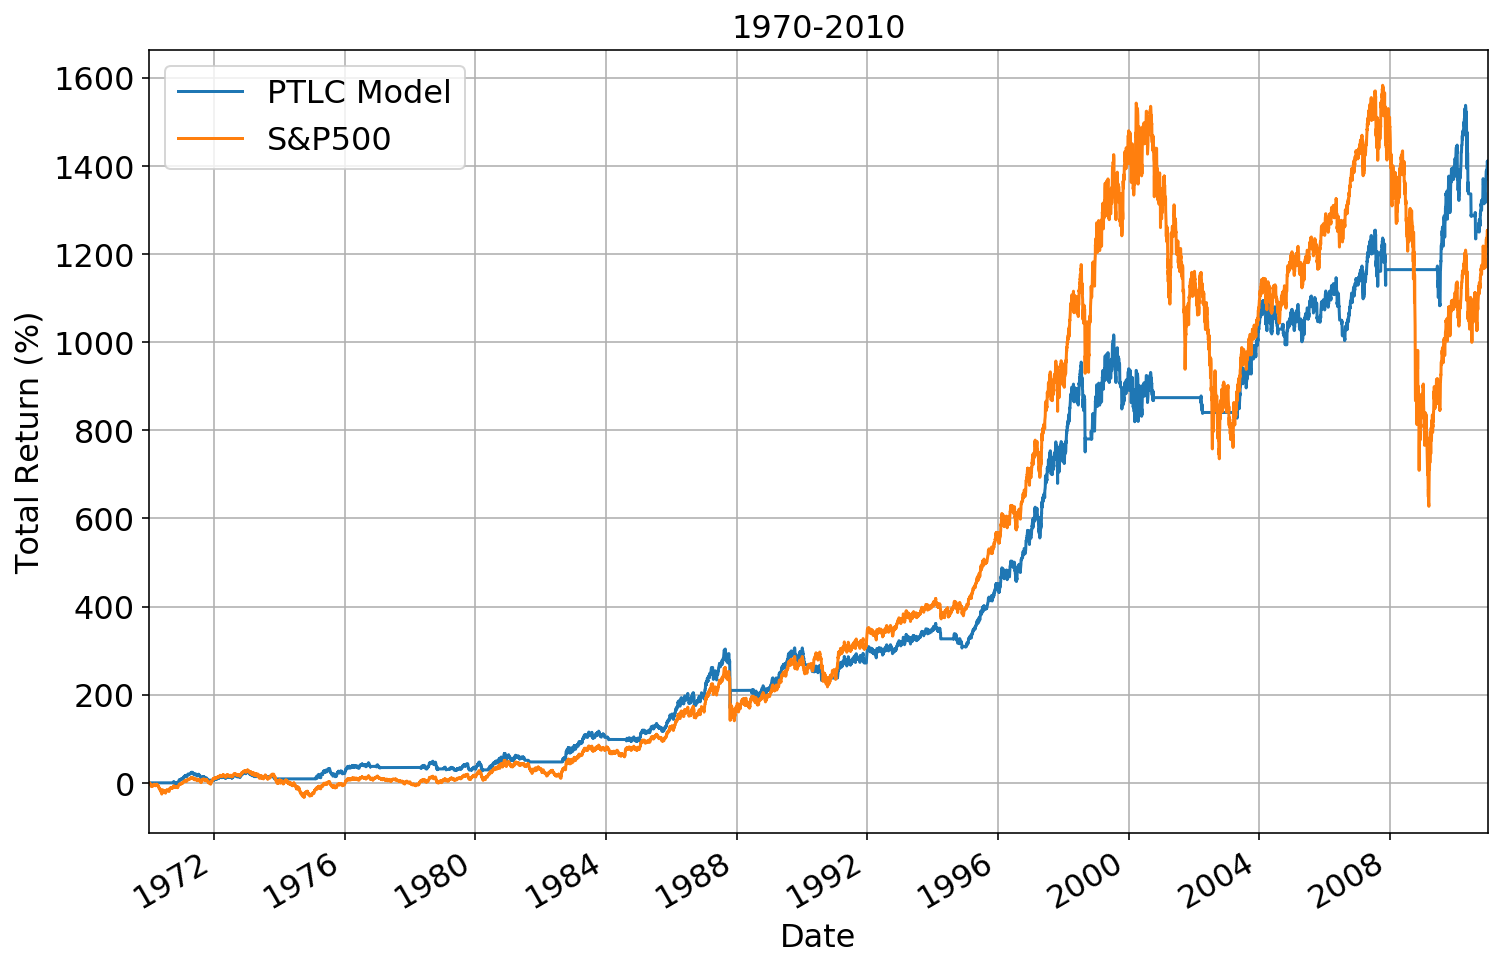

In [11]:
returns(PTLC_model,'1970','2010','PTLC Model')
returns(sp500.Close,'1970','2010', 'S&P500')

Although the model outperformed the S&P 500 from 1930-1970 and 1970-2010, two independent time periods do not provide enough data to confidently predict whether PTLC would typically outperform the S&P 500 over a 40 year period. Instead, we can look at 10 year intervals to get more data from independent time periods.

## 10 Year Returns

In [12]:
def totreturns(ds,start_year,end_year):
    x=ds[start_year:end_year]
    return ((x[-1]-x[0])/x[0])*100

In [25]:
sp500_10=np.zeros(9)
PTLC_10=np.zeros(9)

Years=['1928-1938',
       '1938-1948',
       '1948-1958',
       '1958-1968',
       '1968-1978',
       '1978-1988',
       '1988-1998',
       '1998-2008',
       '2008-2018']
for i in range(9):
    sp500_10[i]=totreturns(sp500.Close,Years[i][:4],Years[i][5:])
    PTLC_10[i]=totreturns(PTLC_model,Years[i][:4],Years[i][5:])
comparison_10 = pd.DataFrame({'S&P 500':sp500_10,'PTLC (Model)':PTLC_10},index=Years)
comparison_10

,S&P 500,PTLC (Model)
1928-1938,-26.013514,86.265727
1938-1948,44.486692,24.436261
1948-1958,259.908729,227.871520
1958-1968,157.525405,111.703506
1968-1978,0.000000,23.043097
1978-1988,196.013644,132.898399
1988-1998,380.280523,212.336309
1998-2008,-7.362773,45.919662
2008-2018,73.225493,90.605991


In [26]:
comparison_10.describe()

,S&P 500,PTLC (Model)
count,9.000000,9.000000
mean,119.784911,106.120053
std,138.896343,74.738342
min,-26.013514,23.043097
25%,0.000000,45.919662
50%,73.225493,90.605991
75%,196.013644,132.898399
max,380.280523,227.871520


## Conclusion
We can see from the table above that over a 10 year period the S&P 500 slightly outperformed PTLC. However, the difference is quite small compared to the standard deviation.  Therefore, for individuals who want to avoid market volatility and yield similar returns to the S&P 500, PTLC may be a good option to consider. It is also worth noting how returns were calculated for this project. For all time periods, it is assumed that a lump some of money is invested at the begining and no money is added. In future work, we will investigate the performance of PTLC when money is continuously invested over time. To view this project in a binder, please click the link below <br>[![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/tk2749/Project/master)